# One-factor analysis of variance (one-way ANOVA)

# Document

<table align="left">
    <tr>
        <th class="text-align:left">Title</th>
        <td class="text-align:left">One-factor analysis of variance (one-way ANOVA)</td>
    </tr>
    <tr>
        <th class="text-align:left">Last modified</th>
        <td class="text-align:left">2022-11-21</td>
    </tr>
    <tr>
        <th class="text-align:left">Author</th>
        <td class="text-align:left">Gilles Pilon <gillespilon13@gmail.com></td>
    </tr>
    <tr>
        <th class="text-align:left">Status</th>
        <td class="text-align:left">Active</td>
    </tr>
    <tr>
        <th class="text-align:left">Type</th>
        <td class="text-align:left">Jupyter notebook</td>
    </tr>
    <tr>
        <th class="text-align:left">Created</th>
        <td class="text-align:left">2018-08-16</td>
    </tr>
    <tr>
        <th class="text-align:left">File name</th>
        <td class="text-align:left">anova_one_factor.ipynb</td>
    </tr>
    <tr>
        <th class="text-align:left">Other files required</th>
        <td class="text-align:left">anova_one_factor.csv</td>
    </tr>
</table>

# In brevi

The purpose of this repository is to illustrate a one-factor analysis of variance (one-way ANOVA). In addition, there are statistical and graphical analyses.

A one-factor ANOVA determines if the average of the dependent variable is statistically, significantly different for one or more of the levels of the independent variable.

# Methodology

Various data munging operations are performed using pandas. Various statistical analyses are performed using statsmodels, scipy, and numpy.

# Data

Download the data file.

[anova_one_factor.csv](https://drive.google.com/open?id=1smA0Brf2BiHUugRUhQWCiEj5hbyYv1DS)

In [1]:
# Start of time estimation for the notebook.
import datetime as dt

In [2]:
# Import the required librairies.
import statsmodels.stats.multicomp as ssm
import statsmodels.api as sm
import scipy.stats as st
import datasense as ds
import pandas as pd
import math

In [3]:
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [4]:
start_time = dt.datetime.now()

In [5]:
# Declare the constants.
# Type I error, alpha level, significance level.
significance_level = 0.05
confidence_level = 1 - significance_level
#bootstrap_number_samples = 10000

In [6]:
# Read the data file.
# y is the dependent variable.
# x is the independent variable.
# w is the independent variable.
df = pd.read_csv('anova_one_factor.csv')

In [7]:
# Show the columns in the data file.
# y is the column of response values.
# x is the column of factor levels, as numbers.
# w is the column of factor levels, as text.
df.columns

Index(['y', 'x', 'w'], dtype='object')

In [8]:
# Information about the independent factor x.
df['x'].unique()

array([1, 3, 2])

In [9]:
# Information about the independent factor w.
df['w'].unique()

array(['A', 'C', 'B'], dtype=object)

In [10]:
# Calculate basic statistics for y by group within x.
groupby_x = df['y'].groupby(df['x'])
round(groupby_x.describe(), 3)

,count,mean,std,min,25%,50%,75%,max
x,,,,,,,,
1,603.0,81.528,5.102,62.44,78.892,81.60,84.54,99.12
2,159.0,79.875,4.842,66.62,76.770,79.50,82.48,94.66
3,17.0,81.715,4.066,76.14,78.360,81.04,85.90,88.62


In [11]:
# Calculate basic statistics for y by group within w.
groupby_w = df['y'].groupby(df['w'])
round(groupby_w.describe(), 3)

,count,mean,std,min,25%,50%,75%,max
w,,,,,,,,
A,603.0,81.528,5.102,62.44,78.892,81.60,84.54,99.12
B,159.0,79.875,4.842,66.62,76.770,79.50,82.48,94.66
C,17.0,81.715,4.066,76.14,78.360,81.04,85.90,88.62


In [12]:
def average_ci(data):
    average_conf_int = sm.stats.DescrStatsW(data).\
                        tconfint_mean(alpha=1-confidence_level,
                                      alternative='two-sided')
    average_conf_int = (round(average_conf_int[0], 3),
                        round(average_conf_int[1], 3))
    return average_conf_int

In [13]:
def std_dev_ci(data):
    numerator = (data.count() - 1) * data.var()
    lower_limit = math.sqrt((numerator / \
                           st.chi2.ppf((1 - confidence_level)/2,
                                       data.count() - 1)))
    upper_limit = math.sqrt(numerator / \
                          st.chi2.ppf((1- (1 - confidence_level)/2),
                                      data.count() - 1))
    std_dev_conf_int = lower_limit, upper_limit
    std_dev_conf_int = (round(std_dev_conf_int[0], 3),
                        round(std_dev_conf_int[1], 3))
    return std_dev_conf_int

In [14]:
#def bootstrap(data, statistic, confidence_level):
#    n = len(data)
#    idx = np.random.randint(0, n, (10000, n))
#    samples = data[idx]
#    stat = np.sort(statistic(samples, 1))
#    return (stat[int(((1 - confidence_level)/2) * number_samples)],
#            stat[int(((1 - (1- confidence_level)/2)) * number_samples)])

In [15]:
#def median_ci(data):
#    low, high = bootstrap(data, np.median, confidence_level)
#    median_conf_int = low, high
#    return median_conf_int

In [16]:
def median_ci(data):
    iqr = data.quantile(q=0.75, interpolation='midpoint') - \
          data.quantile(q=0.25, interpolation='midpoint')
    margin_of_error = 1.57 * iqr / math.sqrt(data.count())
    lower_limit = data.median() - margin_of_error
    upper_limit = data.median() + margin_of_error
    median_conf_int = lower_limit, upper_limit
    median_conf_int = (round(median_conf_int[0], 3),
                       round(median_conf_int[1], 3))
    return median_conf_int

In [17]:
def iqr(data):
    q1 = data.quantile(.25, interpolation='midpoint')
    q2 = data.quantile(.50, interpolation='midpoint')
    q3 = data.quantile(.75, interpolation='midpoint')
    iqr = q3 - q1
    q1 = round(q1, 3)
    q2 = round(q2, 3)
    q3 = round(q3, 3)
    iqr = round(iqr,3)
    return iqr

In [18]:
# Calculate specific statistics for y by group.
average_ci.__name__ = 'mean ci'
std_dev_ci.__name__ = 'std dev ci'
median_ci.__name__ = 'median ci'
iqr.__name__ = 'iqr'
f = {'y' : ['count', 'mean', average_ci, 'median', median_ci, iqr, 'std', std_dev_ci]}
grouped = df.groupby(['x', 'w']).agg(f)
# Create better names for the columns:
grouped.columns = [" ".join(x) for x in grouped.columns.ravel()]
grouped.round(3)

/tmp/ipykernel_87445/2368475712.py:9: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  grouped.columns = [" ".join(x) for x in grouped.columns.ravel()]


,,y count,y mean,y mean ci,y median,y median ci,y iqr,y std,y std dev ci
x,w,,,,,,,,
1,A,603,81.528,"(81.12, 81.936)",81.60,"(81.239, 81.961)",5.648,5.102,"(5.408, 4.829)"
2,B,159,79.875,"(79.117, 80.634)",79.50,"(78.789, 80.211)",5.710,4.842,"(5.442, 4.362)"
3,C,17,81.715,"(79.625, 83.806)",81.04,"(78.169, 83.911)",7.540,4.066,"(6.188, 3.028)"


# Box plots

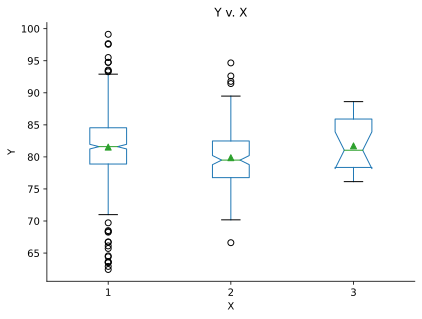

In [19]:
# Plot a box plot of y v. x.
ax = df.boxplot(column='y', by='x', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. X')
ax.set_ylabel('Y')
ax.set_xlabel('X')
ds.despine(ax=ax)

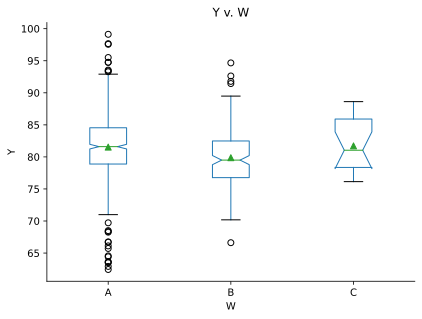

In [20]:
# Plot a box plot of y v. w.
# Add the "magic function" to render figures in a Jupyter notebook.
# This is not required in a Python script file.
ax = df.boxplot(column='y', by='w', grid=False, notch=True,\
                       showmeans=True)
ax.get_figure().suptitle("")
ax.set_title('Y v. W')
ax.set_ylabel('Y')
ax.set_xlabel('W')
ds.despine(ax=ax)

# Perform an analysis of variance (ANOVA)

<table align="left">
    <tr>
        <td class="text-align:left">Null hypothesis H<sub>0</sub></td>
        <td class="text-align:left">Mean values of y for each level of x are equal.</td>
    </tr>
    <tr>
        <td class="text-align:left">Alternative hypothesis H<sub>a</sub></td>
        <td class="text-align:left">One or more mean values of y for each level of x are not equal.</td>
    </tr>
</table>

In [21]:
# Perform a bsic analysis of variance (ANOVA).
# C(x) refers to x as a categorical variable.
model_x = sm.formula.ols('y ~ C(x)', data = df).fit()
anova_x_table = sm.stats.anova_lm(model_x, typ = 1)
anova_x_table.round(3)

,df,sum_sq,mean_sq,F,PR(>F)
C(x),2.0,348.267,174.134,6.88,0.001
Residual,776.0,19640.051,25.309,NaN,NaN


# Results, brief

In [22]:
# Standard deviation of the residuals.
round(math.sqrt(model_x.scale), 3)

5.031

In [23]:
# R squared.
round((model_x.rsquared), 3)

0.017

In [24]:
# R squared adjusted
round((model_x.rsquared_adj), 3)

0.015

# Results, detailed

In [25]:
# Perform a linear regression.
#model_x.summary() # For non-categorical X.
model_x.summary2() # For categorical X.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.015    
Dependent Variable: y                AIC:                4730.7847
Date:               2022-11-21 08:56 BIC:                4744.7588
No. Observations:   779              Log-Likelihood:     -2362.4  
Df Model:           2                F-statistic:        6.880    
Df Residuals:       776              Prob (F-statistic): 0.00109  
R-squared:          0.017            Scale:              25.309   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     81.5279    0.2049  397.9463  0.0000  81.1257  81.9301
C(x)[T.2]     -1.6524    0.4485   -3.6843  0.0002  -2.5328  -0.7720
C(x)[T.3]      0.1874    1.2372    0.1515  0.8797  -2.2413   2.6161
------------------------------------------------------------------
Omnibus:               36.419       Durbin-Watson:          0.646 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       83.640
Skew:                  -0.240       Prob(JB):               0.000 
Kurtosis:              4.532        Condition No.:          7     
==================================================================

"""

In [26]:
mc_results_x = ssm.MultiComparison(df['y'], df['x'])
mc_results_x_tukey_hsd = mc_results_x.tukeyhsd()
print(mc_results_x_tukey_hsd)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     1      2  -1.6524 0.0007 -2.7056 -0.5992   True
     1      3   0.1874 0.9874 -2.7179  3.0927  False
     2      3   1.8398 0.3243 -1.1747  4.8543  False
----------------------------------------------------


In [27]:
# C(w) refers to w as a categorical variable.
model_w = sm.formula.ols('y ~ C(w)',data=df).fit()
anova_w_table = sm.stats.anova_lm(model_w, typ=1)
anova_w_table.round(3)

,df,sum_sq,mean_sq,F,PR(>F)
C(w),2.0,348.267,174.134,6.88,0.001
Residual,776.0,19640.051,25.309,NaN,NaN


In [28]:
#model_w.summary() # For non-categorical X.
model_w.summary2() # For categorical X.

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.015    
Dependent Variable: y                AIC:                4730.7847
Date:               2022-11-21 08:56 BIC:                4744.7588
No. Observations:   779              Log-Likelihood:     -2362.4  
Df Model:           2                F-statistic:        6.880    
Df Residuals:       776              Prob (F-statistic): 0.00109  
R-squared:          0.017            Scale:              25.309   
-------------------------------------------------------------------
               Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     81.5279    0.2049  397.9463  0.0000  81.1257  81.9301
C(w)[T.B]     -1.6524    0.4485   -3.6843  0.0002  -2.5328  -0.7720
C(w)[T.C]      0.1874    1.2372    0.1515  0.8797  -2.2413   2.6161
------------------------------------------------------------------
Omnibus:               36.419       Durbin-Watson:          0.646 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       83.640
Skew:                  -0.240       Prob(JB):               0.000 
Kurtosis:              4.532        Condition No.:          7     
==================================================================

"""

In [29]:
mc_results_w = ssm.MultiComparison(df['y'], df['w'])
mc_results_w_tukey_hsd = mc_results_w.tukeyhsd()
print(mc_results_w_tukey_hsd)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B  -1.6524 0.0007 -2.7056 -0.5992   True
     A      C   0.1874 0.9874 -2.7179  3.0927  False
     B      C   1.8398 0.3243 -1.1747  4.8543  False
----------------------------------------------------


In [30]:
# End of time estimation for the notebook.
end_time = dt.datetime.now()
(end_time - start_time).total_seconds()

1.065348

# Future work

- Add six-number summary.
- Plot the residuals on normal probability paper.
- Scatter plot of y v. x.
- Add a linear regression to the scatter plot.

# References

[pandas](https://pandas.pydata.org/pandas-docs/stable/index.html)

[statsmodels](https://www.statsmodels.org/stable/index.html)

[scipy](https://docs.scipy.org/doc/scipy/reference/)

[numpy](https://docs.scipy.org/doc/numpy/reference/)